<>:48: SyntaxWarning: invalid escape sequence '\O'
<>:49: SyntaxWarning: invalid escape sequence '\O'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\O'
<>:49: SyntaxWarning: invalid escape sequence '\O'
<>:52: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_193482/2555396631.py:48: SyntaxWarning: invalid escape sequence '\O'
  plt.plot(e[sigmas_cl[:,i,j]>0], sigmas_cl[sigmas_cl[:,i,j]>0,i,j], label=f'{sign}, $\Omega={omega}$, Airy Propagator', linestyle=lines[omega])
/tmp/ipykernel_193482/2555396631.py:49: SyntaxWarning: invalid escape sequence '\O'
  plt.plot(e[sigmas_lo[:,i,j]>0], sigmas_lo[sigmas_lo[:,i,j]>0,i,j], label=f'{sign}, $\Omega={omega}$, EDWBA', linestyle=lines[omega])
/tmp/ipykernel_193482/2555396631.py:52: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$, cm${}^{2}$')


0+
0-


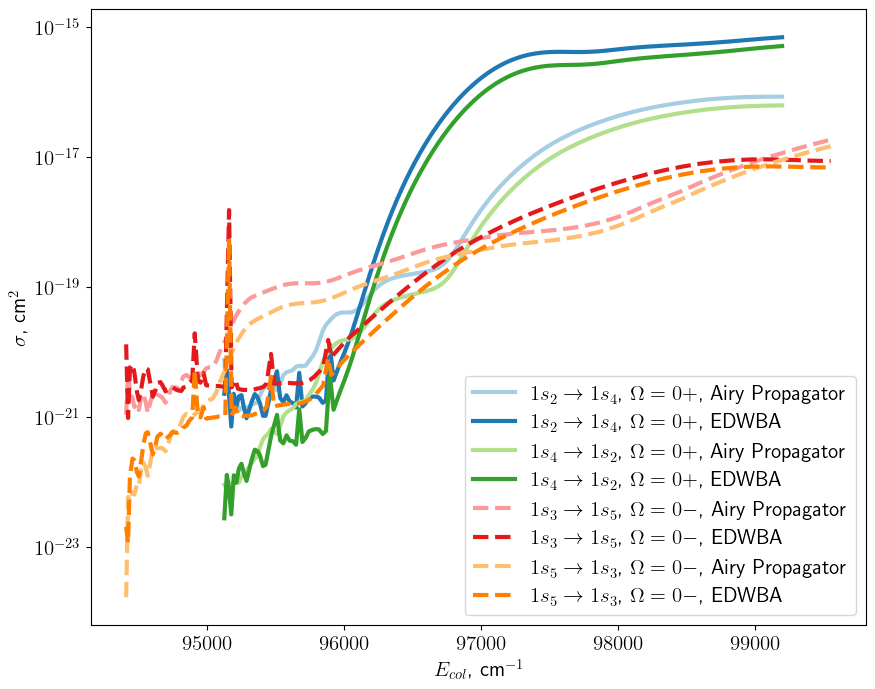

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cycler
from funcs import *
from scipy.interpolate import make_interp_spline

# dirs = [n for n in os.listdir() if (os.path.isdir(n) and (n[-2:]=='_s'))]
# dirp = [n for n in os.listdir() if (os.path.isdir(n) and (n[-2:]=='_p'))]
dirs = ['H_0_plus_s', 'H_0_minus_s', 'H_2_s', 'H_3_p']


plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['image.cmap'] = 'Paired'
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
                                                          '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'])
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['lines.linewidth'] = 3

emax = []
emin = []
for dir in dirs:
    r, hls, ddrls = load_matrices(dir)
    n = len(hls[0])
    if n > 1:
        sig_mat_cloud = np.loadtxt(f'{dir}/sigmas_total_airy_latest_scipy.txt', skiprows=1)
        sig_mat_local = np.loadtxt(f'{dir}/sigmas_total_exp.txt', skiprows=1)
        e = sig_mat_cloud[:,0]
        emax.append(np.max(e))
        emin.append(np.min(e[np.argwhere(sig_mat_cloud[:,1] != 0)]))
        sigmas_cl = np.zeros((len(e),n,n))
        sigmas_lo = np.zeros((len(e),n,n))
        for i in range(n):
            for j in range(n):
                sigmas_cl[:,i,j] = sig_mat_cloud[:,i*n+j+1]
                sigmas_lo[:,i,j] = sig_mat_local[:,i*n+j+1]
        omega = dir[2:-2] if dir[2] != '0' else ('0+' if dir[2:5]=='0_p' else '0-')
        print(omega)
        group = dir[-1]
        signs = labels[group][omega]
        for i in range(n):
            for j in range(n):
                if i != j:
                    # if (group == 'p' and int(signs[i][2:]) > 7 and int(signs[j][2:]) > 7) or (group == 's' and int(signs[i][2:]) > 3 and int(signs[j][2:]) > 3):
                    sign = f'${{{signs[j][:2]}_{{{signs[j][2:]}}} \\rightarrow {signs[i][:2]}_{{{signs[i][2:]}}}}}$'
                    plt.plot(e[sigmas_cl[:,i,j]>0], sigmas_cl[sigmas_cl[:,i,j]>0,i,j], label=f'{sign}, $\Omega={omega}$, Airy Propagator', linestyle=lines[omega])
                    plt.plot(e[sigmas_lo[:,i,j]>0], sigmas_lo[sigmas_lo[:,i,j]>0,i,j], label=f'{sign}, $\Omega={omega}$, EDWBA', linestyle=lines[omega])
plt.semilogy()
plt.xlabel('$E_{col}$, cm${}^{-1}$')
plt.ylabel('$\sigma$, cm${}^{2}$')
# plt.ylim(1e-24, 1e-14)
# plt.xlim(np.min(np.array(emin))-200, np.min(np.array(emax))+200)
if group == 'p':
    plt.legend(ncol=2,fontsize=13)
    # plt.legend(ncol=2)
else:
    plt.legend()
plt.show()